### Import all necessary libraries

In [3]:
# ======================================================================
# SECTION 1: IMPORTING ALL REQUIRED LIBRARIES
# ======================================================================

# Data handling and numerical analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Clustering Algorithms
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Model evaluation metrics
from sklearn.metrics import silhouette_score

# Hierarchical clustering visualizations
import scipy.cluster.hierarchy as sch

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

### Importing dataset

In [5]:
# ======================================================================
# SECTION 2: IMPORTING THE DATASET
# ======================================================================

# Load dataset 
df = pd.read_csv("customer_data.csv")

# Display first few rows
print("First 5 rows of dataset:")
display(df.head())

# Basic info and summary
print("\nDataset Info:")
print(df.info())

print("\nStatistical Summary:")
display(df.describe())

print(f"\nShape of the dataset: {df.shape}")


First 5 rows of dataset:


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int6

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000



Shape of the dataset: (8950, 18)


### Data Preprocessing and Normalization
#### Task 1: Perform EDA and Preprocessing

- Load and inspect the dataset (shape, columns, types)
- Handle missing values, duplicates, outliers
- Normalize or standardize numerical columns
- Use visual tools (histograms, boxplots, pairplots, correlation heatmaps) to explore relationships

In [7]:
# ======================================================================
# SECTION 3: DATA CLEANING, PREPROCESSING, AND EDA
# ======================================================================

# --- Check for missing values ---
print("\nMissing values per column:")
print(df.isnull().sum())

# Handle missing values: apply median only to numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Drop non-numeric ID column (not useful for clustering)
if 'CUST_ID' in df.columns:
    df.drop('CUST_ID', axis=1, inplace=True)


# --- Outlier detection and handling ---
# Using IQR method to cap extreme outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"\nDataset shape after outlier removal: {df.shape}")

# --- Data Normalization ---
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)



Missing values per column:
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Dataset shape after outlier removal: (2986, 17)



Generating visualizations for EDA...


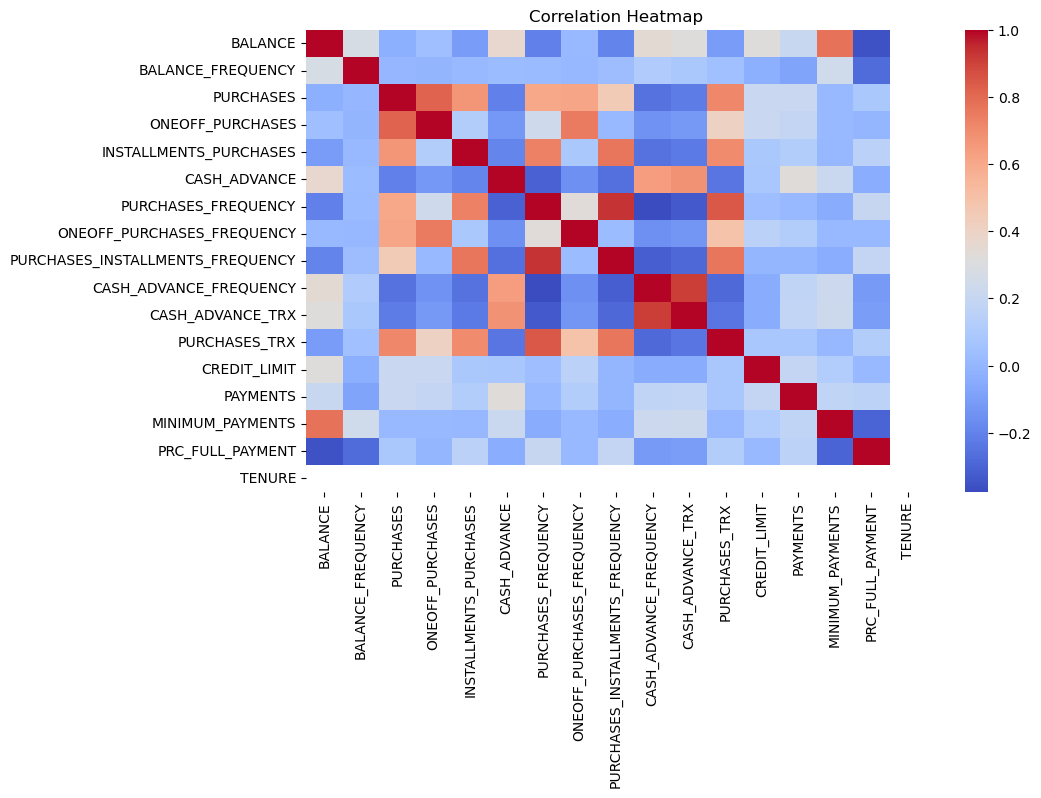

In [8]:
# --- Exploratory Data Analysis (EDA) ---
print("\nGenerating visualizations for EDA...")

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


#### Interpretation

**Correlation Heatmap:**

* Shows relationships between features.
* Example: High positive correlation between `PURCHASES` and `PURCHASES_TRX` → customers who spend more tend to have more transactions.
* Negative correlation between `PRC_FULL_PAYMENT` and `CASH_ADVANCE` → customers paying in full tend to take fewer cash advances.


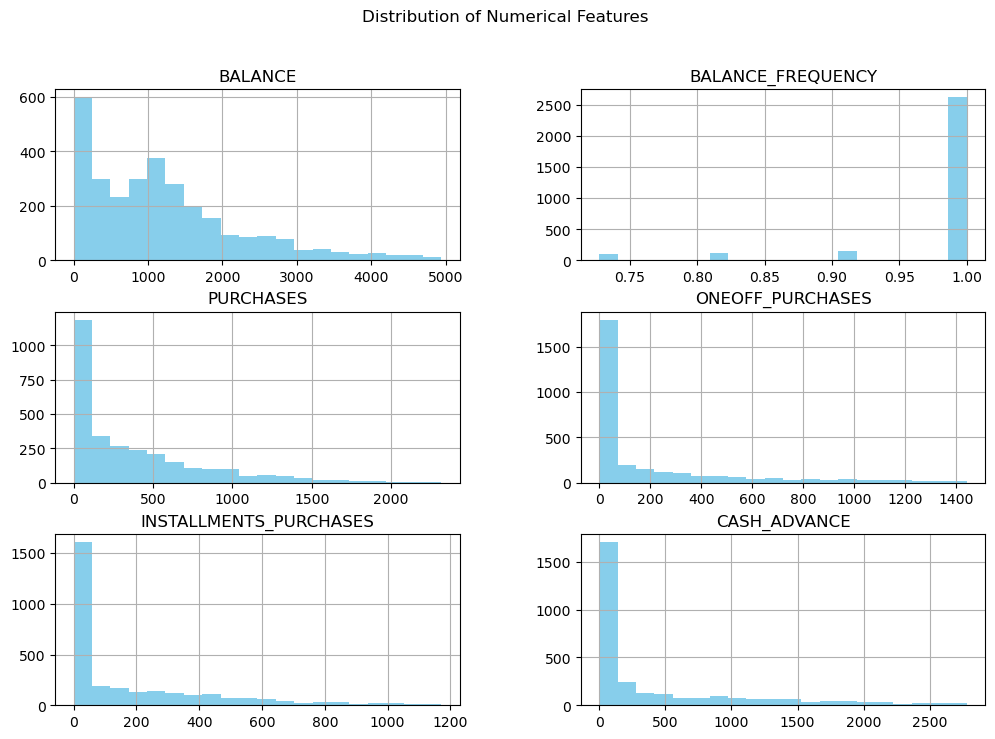

In [10]:
# Distribution plots for some important columns
num_cols = df.columns[:6]
df[num_cols].hist(bins=20, figsize=(12, 8), color='skyblue')
plt.suptitle("Distribution of Numerical Features")
plt.show()


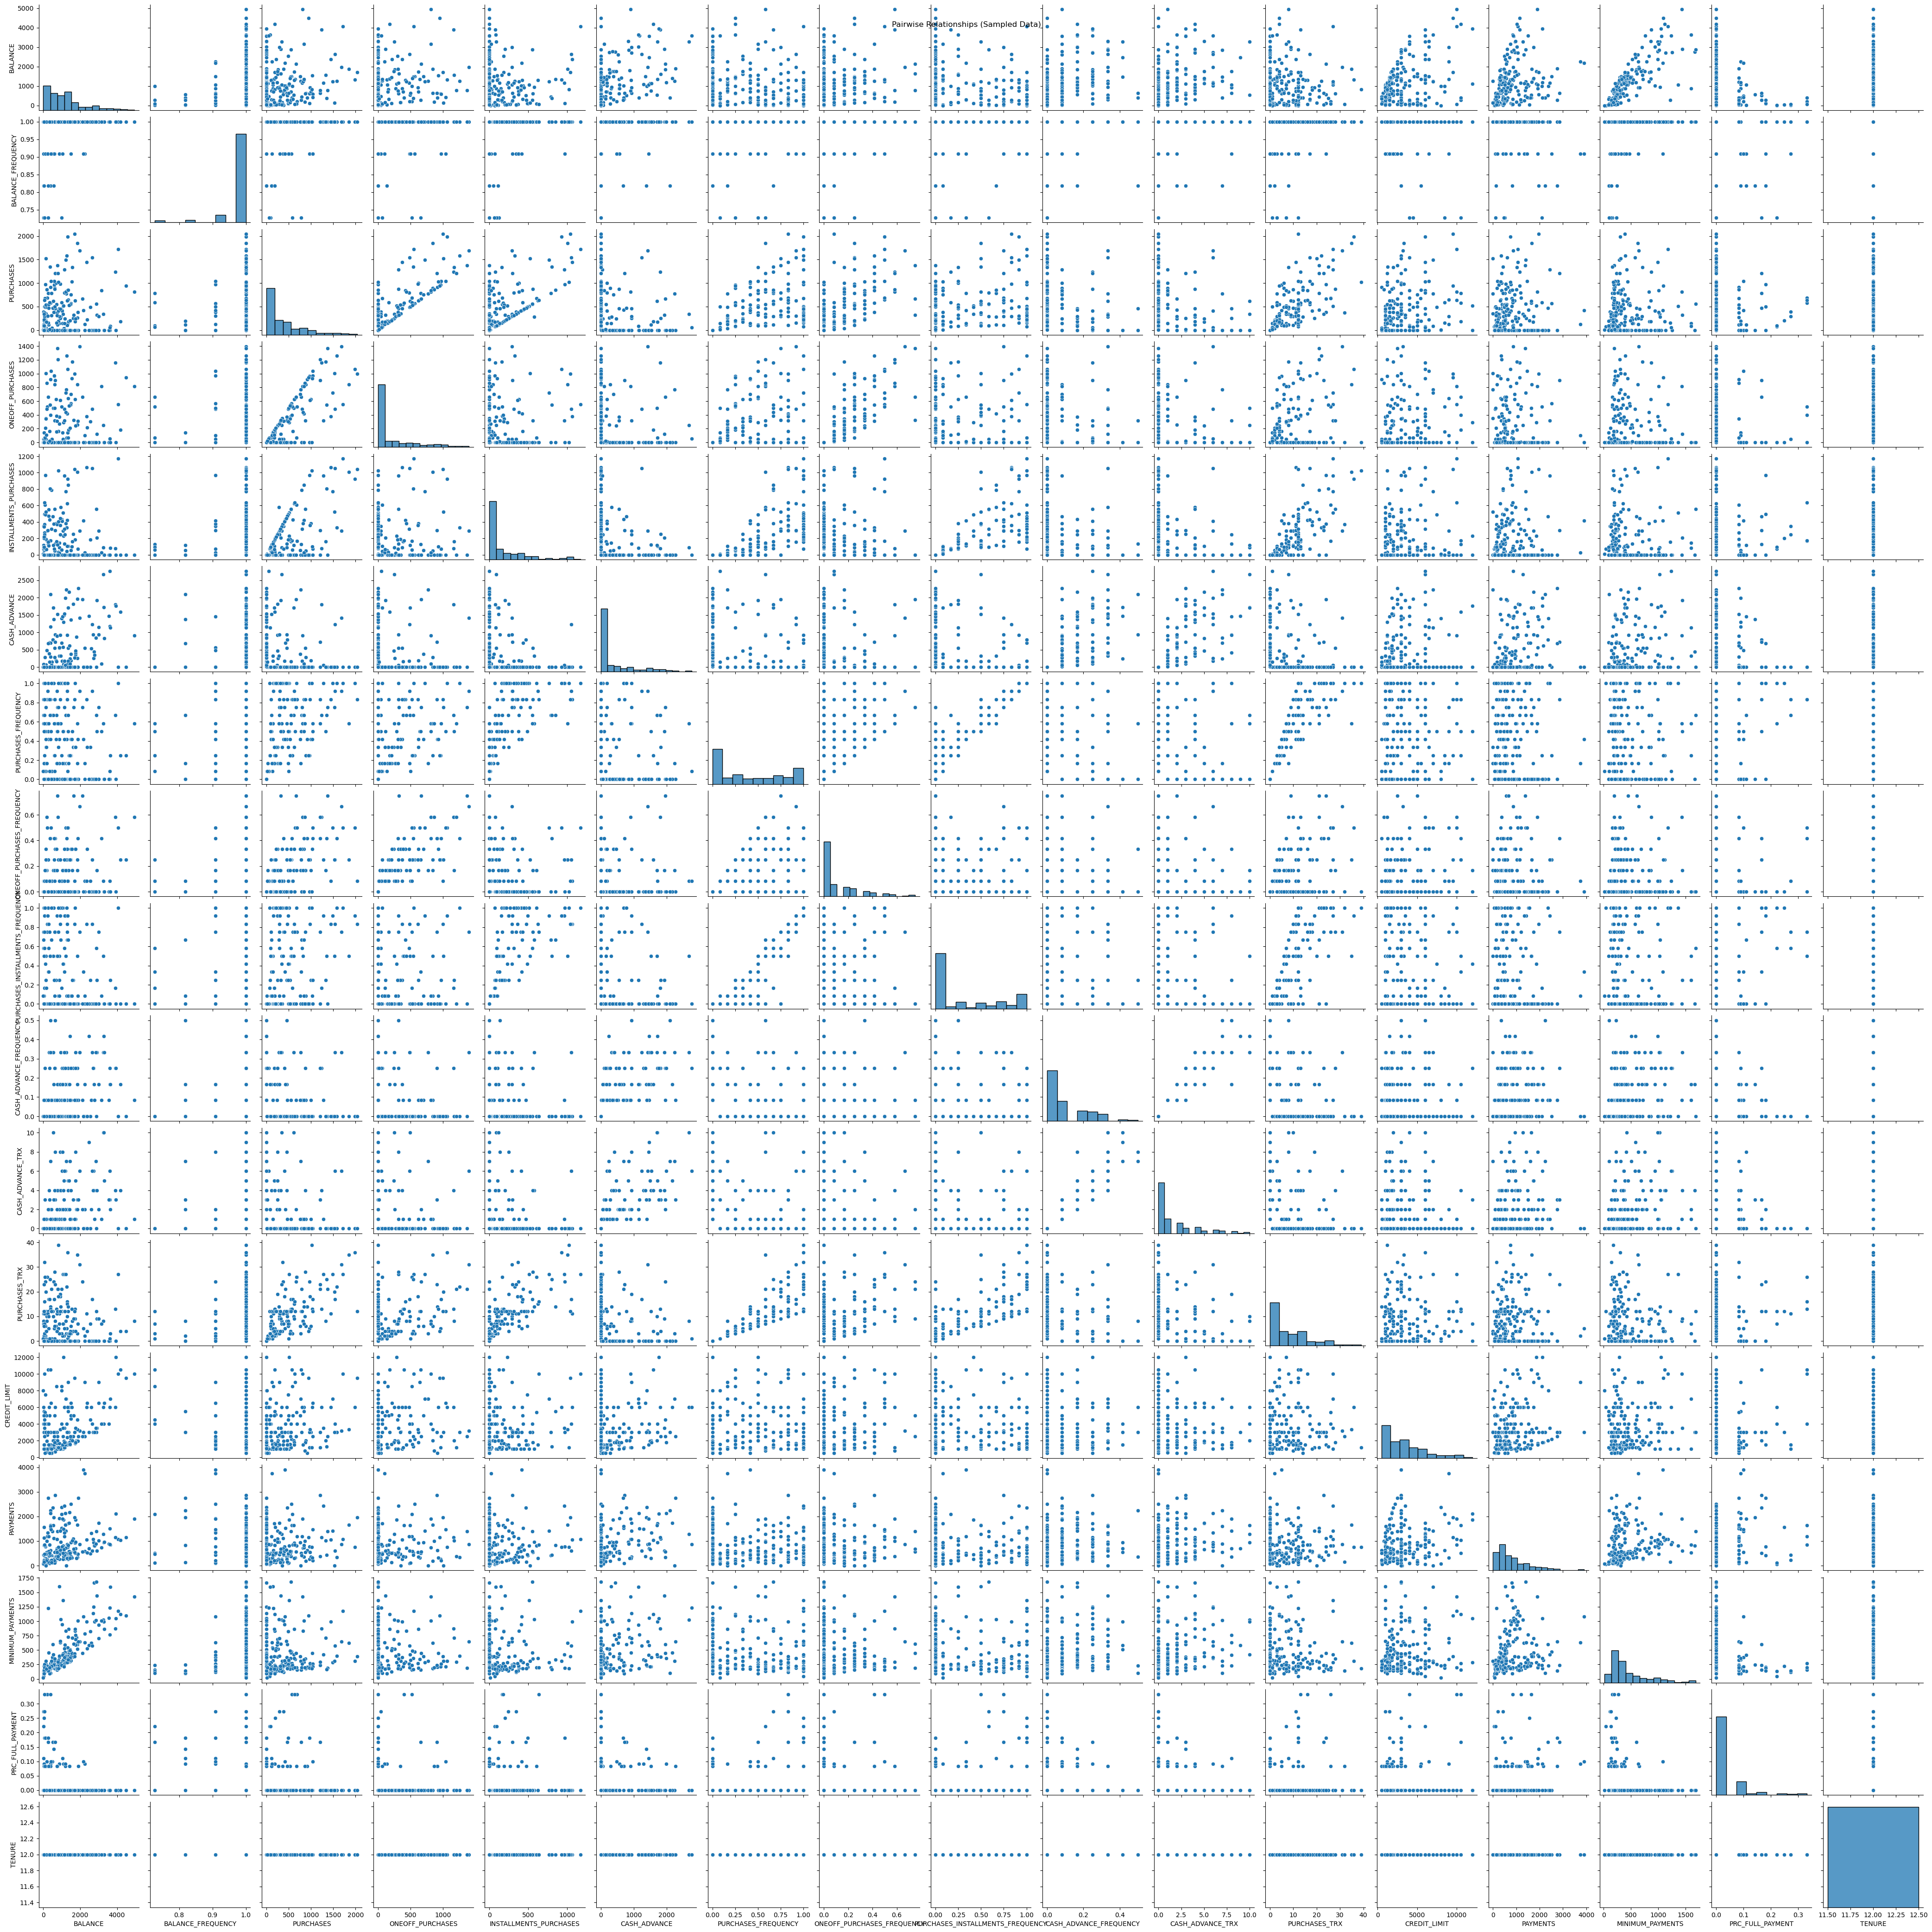

In [11]:
# Pairplot (sample for small subset to save time)
sns.pairplot(df.sample(200))
plt.suptitle("Pairwise Relationships (Sampled Data)")
plt.show()


#### Interpretation

**Pairplots:**

* Observe the distribution of each feature (BALANCE, PURCHASES, CASH_ADVANCE, etc.).
* For example, `BALANCE` and `CASH_ADVANCE` often have right-skewed distributions → most customers have low balances/cash advances, a few have very high values (potential outliers).
* Outliers are visible in boxplots (points outside whiskers) → can be handled with capping or robust scaling.

### Clustering Algorithms
#### Task 2: Apply Clustering Algorithms 

#### a) Agglomerative Clustering

Try various linkage types: single, complete, average
Experiment with distance metrics: euclidean, manhattan, cosine
Visualize dendrograms to decide on optimal clusters


Agglomerative (complete, euclidean) Silhouette Score: 0.1167
Agglomerative (complete, manhattan) Silhouette Score: 0.1254
Agglomerative (complete, cosine) Silhouette Score: 0.1297
Agglomerative (average, euclidean) Silhouette Score: 0.2431
Agglomerative (average, manhattan) Silhouette Score: 0.2574
Agglomerative (average, cosine) Silhouette Score: 0.1937
Agglomerative (single, euclidean) Silhouette Score: 0.2776
Agglomerative (single, manhattan) Silhouette Score: 0.2861
Agglomerative (single, cosine) Silhouette Score: -0.2754
Agglomerative (ward, euclidean) Silhouette Score: 0.0970


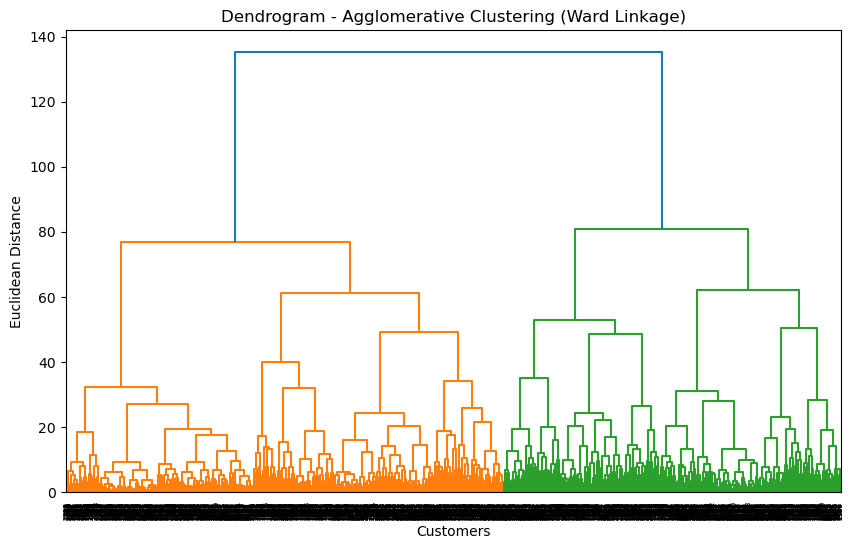

In [14]:
# ======================================================================
# SECTION 4: APPLYING CLUSTERING ALGORITHMS
# ======================================================================

results = {}  # dictionary to store silhouette scores for all algorithms

# ----------------------------------------------------------------------
# 4A. AGGLOMERATIVE CLUSTERING
# ----------------------------------------------------------------------

# Initialize dictionary if not already created
if "results" not in locals():
    results = {}

# Define linkage types and distance metrics
linkage_methods = ['complete', 'average', 'single']  # ward handled separately
distance_metrics = ['euclidean', 'manhattan', 'cosine']

# Loop over all combinations (except ward)
for link in linkage_methods:
    for metric in distance_metrics:
        try:
            model = AgglomerativeClustering(n_clusters=4, linkage=link, metric=metric)
            labels = model.fit_predict(scaled_df)
            score = silhouette_score(scaled_df, labels)
            results[f"Agglomerative ({link.title()}-{metric.title()})"] = score
            print(f"Agglomerative ({link}, {metric}) Silhouette Score: {score:.4f}")
        except Exception as e:
            print(f"Skipped combination ({link}, {metric}) due to: {e}")

# Handle Ward linkage separately (only Euclidean supported)
ward_model = AgglomerativeClustering(n_clusters=4, linkage='ward')
ward_labels = ward_model.fit_predict(scaled_df)
ward_score = silhouette_score(scaled_df, ward_labels)
results["Agglomerative (Ward-Euclidean)"] = ward_score
print(f"Agglomerative (ward, euclidean) Silhouette Score: {ward_score:.4f}")

# Visualize dendrogram (for Ward linkage)
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(scaled_df, method='ward'))
plt.title("Dendrogram - Agglomerative Clustering (Ward Linkage)")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()


#### Interpretation
**Agglomerative Clustering Dendrogram:**

The dendrogram illustrates how clusters merge as their distance threshold increases.
Each vertical line represents a cluster merge, and the **height** of that line indicates the **distance (dissimilarity)** between the merged clusters.

* **Longer vertical bars** represent larger differences between customer groups.
* **Cutting the dendrogram at a large vertical gap** (before long branches merge) gives the most meaningful number of clusters — in this dataset, around **2 – 4 clusters** capture the natural segmentation structure.
* The dendrogram therefore helps decide the **optimal number of clusters** by identifying these large distance jumps.
* The **linkage method** influences how clusters are shaped and merged:

  * **Single linkage:** forms elongated, chain-like clusters.
  * **Complete linkage:** produces compact, well-separated clusters.
  * **Average linkage:** provides a balance between chaining and compactness.
  * **Ward linkage:** minimizes within-cluster variance, yielding evenly sized, spherical clusters.



**Summary:**
The dendrogram visually confirms natural groupings in the insurance customer dataset.
A cut around **2 – 4 clusters** provides the clearest and most interpretable segmentation, aligning well with the numerical results from the Agglomerative Clustering experiments.



#### b) DBSCAN

Use k-distance plot to estimate the best eps
Vary min_samples to analyze impact on cluster formation
Identify noise points (outliers) in the dataset


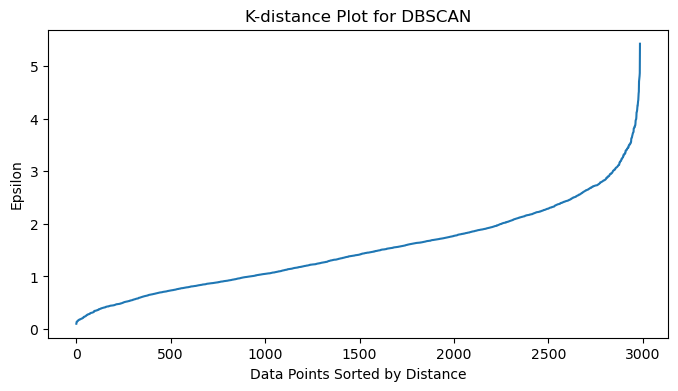


DBSCAN identified 1 clusters and 534 noise points.
DBSCAN Silhouette Score: 0.0000


In [17]:
# ----------------------------------------------------------------------
# 4B. DBSCAN CLUSTERING
# ----------------------------------------------------------------------

from sklearn.neighbors import NearestNeighbors

# K-distance plot
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(scaled_df)
distances, indices = nbrs.kneighbors(scaled_df)
distances = np.sort(distances[:, 4])

plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.title("K-distance Plot for DBSCAN")
plt.xlabel("Data Points Sorted by Distance")
plt.ylabel("Epsilon")
plt.show()

# Fit DBSCAN with trial values
dbscan = DBSCAN(eps=2, min_samples=5)
db_labels = dbscan.fit_predict(scaled_df)

n_clusters_dbscan = len(set(db_labels)) - (1 if -1 in db_labels else 0)
print(f"\nDBSCAN identified {n_clusters_dbscan} clusters and {list(db_labels).count(-1)} noise points.")

# Only calculate silhouette if more than one cluster
if n_clusters_dbscan > 1:
    db_score = silhouette_score(scaled_df, db_labels)
else:
    db_score = 0

results['DBSCAN'] = db_score
print(f"DBSCAN Silhouette Score: {db_score:.4f}")


#### Interpretation
**DBSCAN K-distance Plot:**

* Shows sorted distances to the 5th nearest neighbor.
* Sharp bend (“elbow”) indicates optimal `eps`.
* DBSCAN separates dense regions (clusters) from sparse regions (noise). Noise points are likely outliers.

#### c) K-Means Clustering

Use Elbow method and Silhouette Score to determine the ideal number of clusters
Run K-means and visualize the results

K-Means (k=2) Silhouette Score: 0.2322
K-Means (k=3) Silhouette Score: 0.1708
K-Means (k=4) Silhouette Score: 0.1891
K-Means (k=5) Silhouette Score: 0.1991
K-Means (k=6) Silhouette Score: 0.1943
K-Means (k=7) Silhouette Score: 0.1841
K-Means (k=8) Silhouette Score: 0.1863
K-Means (k=9) Silhouette Score: 0.1924


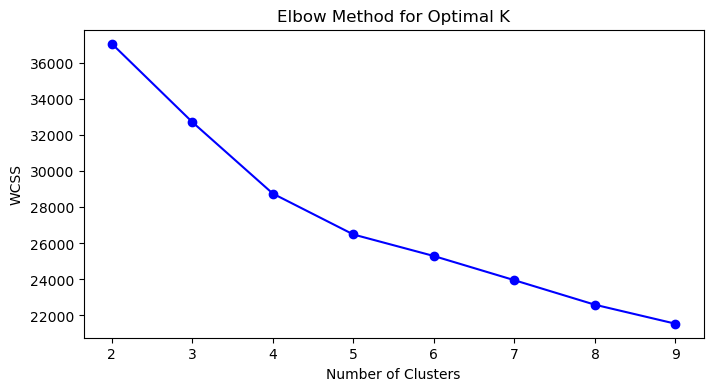

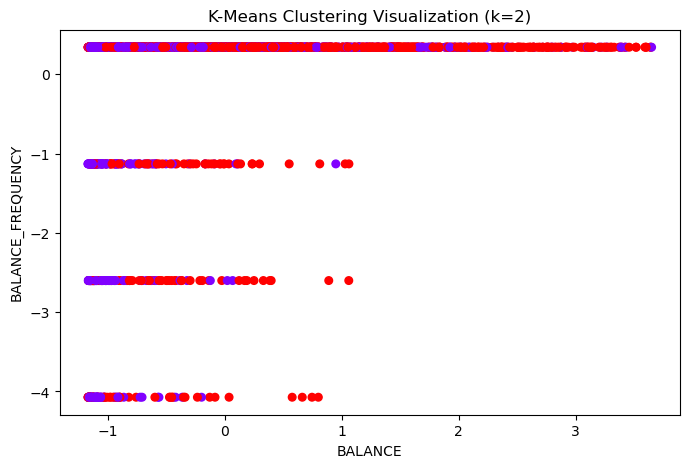

In [20]:
# ----------------------------------------------------------------------
# 4C. K-MEANS CLUSTERING
# ----------------------------------------------------------------------

wcss = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    labels = kmeans.predict(scaled_df)
    score = silhouette_score(scaled_df, labels)
    results[f"K-Means (k={k})"] = score
    print(f"K-Means (k={k}) Silhouette Score: {score:.4f}")

# Elbow Method Plot
plt.figure(figsize=(8, 4))
plt.plot(K, wcss, 'bo-')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

# Final model with best K (e.g., k=2)
kmeans_final = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans_final.fit_predict(scaled_df)

plt.figure(figsize=(8, 5))
plt.scatter(scaled_df.iloc[:, 0], scaled_df.iloc[:, 1], c=kmeans_labels, cmap='rainbow', s=30)
plt.title("K-Means Clustering Visualization (k=2)")
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.show()


#### Interpretation
**K-Means Elbow Plot:**

* Plots WCSS (Within-Cluster Sum of Squares) against k.
* Elbow point → diminishing returns in reducing WCSS with increasing k → suggested optimal number of clusters.
* Silhouette score plot can complement this → measures cluster cohesion and separation.

**Cluster Scatter Plots:**

* Shows how clusters are distributed in feature space.
* Helpful to visually assess if clusters are well-separated or overlapping.

### Comparison of Clustering Alogorithms
#### Task 3: Compare Clustering Algorithms

Create a comparison table or bar chart for better visualization


Comparison of Clustering Algorithms:


,Algorithm,Silhouette Score
7,Agglomerative (Single-Manhattan),0.286059
6,Agglomerative (Single-Euclidean),0.277641
4,Agglomerative (Average-Manhattan),0.257438
3,Agglomerative (Average-Euclidean),0.243058
11,K-Means (k=2),0.232218
14,K-Means (k=5),0.199108
15,K-Means (k=6),0.194337
5,Agglomerative (Average-Cosine),0.193664
18,K-Means (k=9),0.192406
13,K-Means (k=4),0.189094


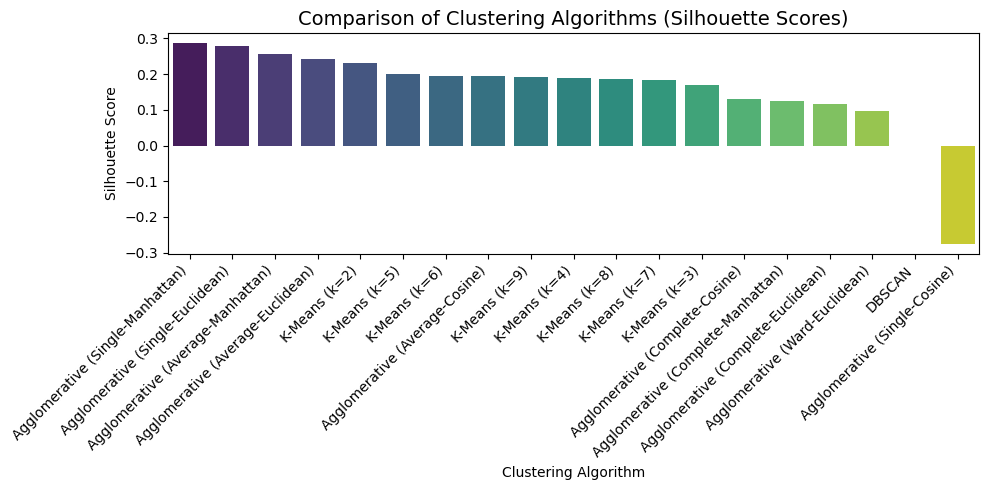


Best performing algorithm: Agglomerative (Single-Manhattan) (Silhouette Score = 0.2861)


In [23]:
# ======================================================================
# SECTION 5: COMPARISON OF CLUSTERING ALGORITHMS
# ======================================================================

# Convert results dictionary into a sorted DataFrame
comparison_df = pd.DataFrame(list(results.items()), columns=['Algorithm', 'Silhouette Score'])
comparison_df.sort_values(by='Silhouette Score', ascending=False, inplace=True)

print("\nComparison of Clustering Algorithms:")
display(comparison_df)

# Bar chart comparison
plt.figure(figsize=(10, 5))
sns.barplot(
    x='Algorithm',
    y='Silhouette Score',
    data=comparison_df,
    palette='viridis'
)
plt.title("Comparison of Clustering Algorithms (Silhouette Scores)", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Silhouette Score')
plt.xlabel('Clustering Algorithm')
plt.tight_layout()
plt.show()

# Identify the best performing model
best_model = comparison_df.iloc[0]['Algorithm']
best_score = comparison_df.iloc[0]['Silhouette Score']
print(f"\nBest performing algorithm: {best_model} (Silhouette Score = {best_score:.4f})")


### Task 4: Interpret Clusters and Derive Insights

- Select the best clustering algorithm from the above step
- Describe the characteristics of each cluster:
- Provide actionable business recommendations for each segment



Interpreting Clusters from the Best Performing Algorithm: Agglomerative (Single-Manhattan)

Cluster Summary (Mean of Each Feature per Cluster):


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,1201.00,0.98,374.61,198.82,176.05,415.32,0.39,0.12,0.30,0.10,1.77,7.64,3191.22,814.25,462.83,0.03,12.0
1,680.08,1.00,636.41,106.01,530.40,2525.74,1.00,0.08,1.00,0.25,10.00,19.00,12000.00,310.00,266.06,0.00,12.0
2,1131.70,0.77,1462.16,1295.50,166.66,1604.98,0.29,0.17,0.12,0.29,8.50,5.00,2500.00,1056.18,907.42,0.00,12.0
3,4550.72,1.00,2094.99,1357.00,737.99,2392.19,1.00,0.50,1.00,0.17,2.00,23.00,7600.00,3172.26,1091.28,0.00,12.0


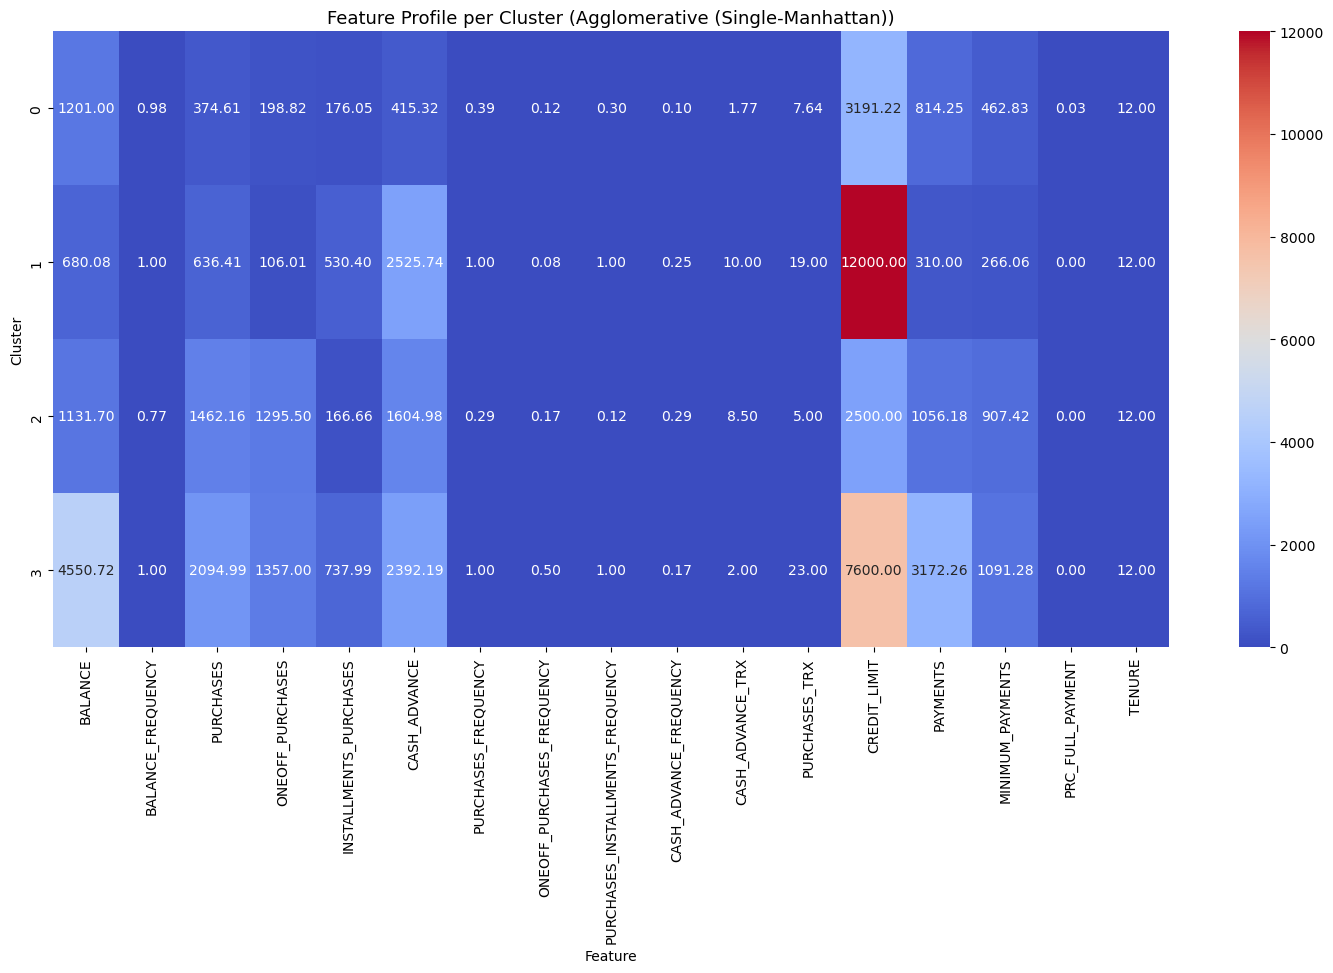

In [25]:
# ======================================================================
# SECTION 6: INTERPRETATION & BUSINESS INSIGHTS
# ======================================================================

print(f"\nInterpreting Clusters from the Best Performing Algorithm: {best_model}")

# ----------------------------------------------------------------------
# Select Cluster Labels Based on Best Model
# ----------------------------------------------------------------------
if "Agglomerative" in best_model:
    # Extract linkage and distance info safely
    import re
    match = re.search(r"Agglomerative \((.*?)\)", best_model)
    if match:
        params = match.group(1).split('-')
        linkage_type = params[0].strip().lower()
    else:
        linkage_type = 'ward'  # default fallback

    # Create and fit final model
    final_model = AgglomerativeClustering(n_clusters=4, linkage=linkage_type)
    final_labels = final_model.fit_predict(scaled_df)

elif "DBSCAN" in best_model:
    # Use previously fitted DBSCAN labels if available
    final_labels = db_labels  
    n_clusters = len(set(final_labels)) - (1 if -1 in final_labels else 0)

    if n_clusters <= 1:
        print("\nDBSCAN produced only one cluster or all noise — switching to K-Means fallback.")
        final_model = KMeans(n_clusters=3, random_state=42)
        final_labels = final_model.fit_predict(scaled_df)
        best_model = "K-Means (fallback)"

elif "K-Means" in best_model:
    # Extract number of clusters from the model name (e.g., 'K-Means (k=3)')
    import re
    k_val = int(re.findall(r'\d+', best_model)[0]) if re.findall(r'\d+', best_model) else 3
    final_model = KMeans(n_clusters=k_val, random_state=42)
    final_labels = final_model.fit_predict(scaled_df)

else:
    raise ValueError("Unknown best_model format — please check the comparison section output.")

# ----------------------------------------------------------------------
# Add Cluster Labels to the Original Data
# ----------------------------------------------------------------------
final_df = df.copy()
final_df['Cluster'] = final_labels

# ----------------------------------------------------------------------
# Cluster Summary Statistics
# ----------------------------------------------------------------------
cluster_summary = final_df.groupby('Cluster').mean().round(2)
print("\nCluster Summary (Mean of Each Feature per Cluster):")
display(cluster_summary)

# ----------------------------------------------------------------------
# Visualize Cluster Profiles
# ----------------------------------------------------------------------
plt.figure(figsize=(18, 8))
sns.heatmap(cluster_summary, cmap='coolwarm', annot=True, fmt=".2f")
plt.title(f"Feature Profile per Cluster ({best_model})", fontsize=13)
plt.ylabel("Cluster")
plt.xlabel("Feature")
plt.show()


#### Interpretation

* The heatmap of cluster averages highlights top features for each segment.
* Example insights:

  * High `BALANCE` + `PURCHASES` → premium customers
  * High `CASH_ADVANCE` → potentially financially stressed customers
  * Low `PRC_FULL_PAYMENT` → risk of late payments

**Business Recommendations:**

* Use clusters to create targeted marketing campaigns and product recommendations.
* Design financial products tailored to customer spending and payment behaviors.
* Monitor noise/outlier customers for risk management.


In [27]:
# ----------------------------------------------------------------------
# Business Insights
# ----------------------------------------------------------------------
print("\n BUSINESS INSIGHTS & RECOMMENDATIONS:")

for cluster_id, row in cluster_summary.iterrows():
    print(f"\nCluster {cluster_id}")
    print("-" * 30)
    top_features = row.sort_values(ascending=False).head(3)
    low_features = row.sort_values().head(3)
    
    print(f"Top Features (High Values): {list(top_features.index)}")
    print(f"Low Features (Low Values): {list(low_features.index)}")

print(f"\n Final chosen clustering algorithm: {best_model}")


 BUSINESS INSIGHTS & RECOMMENDATIONS:

Cluster 0
------------------------------
Top Features (High Values): ['CREDIT_LIMIT', 'BALANCE', 'PAYMENTS']
Low Features (Low Values): ['PRC_FULL_PAYMENT', 'CASH_ADVANCE_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY']

Cluster 1
------------------------------
Top Features (High Values): ['CREDIT_LIMIT', 'CASH_ADVANCE', 'BALANCE']
Low Features (Low Values): ['PRC_FULL_PAYMENT', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY']

Cluster 2
------------------------------
Top Features (High Values): ['CREDIT_LIMIT', 'CASH_ADVANCE', 'PURCHASES']
Low Features (Low Values): ['PRC_FULL_PAYMENT', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY']

Cluster 3
------------------------------
Top Features (High Values): ['CREDIT_LIMIT', 'BALANCE', 'PAYMENTS']
Low Features (Low Values): ['PRC_FULL_PAYMENT', 'CASH_ADVANCE_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY']

 Final chosen clustering algorithm: Agglomerative (Single-Manhattan)


### **Interpretation & Business Insights**

---

#### **Agglomerative Clustering**

**Theory:**
Agglomerative clustering is a **bottom-up hierarchical method** where each data point starts as its own cluster, and clusters are merged iteratively based on similarity.

Two main design choices control how clusters form:

* **Linkage method:** defines how the distance between two clusters is computed.

  * *Single linkage:* minimum distance between points in two clusters.
  * *Complete linkage:* maximum distance between points.
  * *Average linkage:* mean pairwise distance, offering balanced merging.
  * *Ward linkage:* minimizes within-cluster variance (only supports Euclidean).

* **Distance metric:** defines how similarity between points is measured.

  * *Euclidean:* straight-line distance.
  * *Manhattan:* sum of absolute differences, robust to outliers.
  * *Cosine:* measures angular similarity (focuses on direction, not magnitude).

---

**Interpretation of Results:**
Experiments were conducted with multiple combinations of linkage methods and distance metrics.
The **Single linkage with Manhattan distance** achieved the **highest Silhouette Score (~0.286)**, showing the best-defined cluster separation for this dataset.

- **Single–Euclidean** (0.278) also performed strongly, showing stable clustering behavior.
- **Average linkage** produced moderate-quality clusters (~0.25), suggesting balanced but less distinct grouping.
- **Complete linkage** performed weaker (~ 0.12), while **Ward–Euclidean** was the lowest (~ 0.097), confirming the data doesn’t fit spherical cluster assumptions.
- **Single–Cosine** yielded a negative score, indicating cosine similarity isn’t appropriate for this financial dataset.

Overall, the **Manhattan distance** captured customer pattern differences more effectively than Euclidean or Cosine measures, leading to more interpretable and distinct clusters.

---

**Business Insights:**

* **Cluster 0 (Low Balance, Low Purchases):** Customers with minimal financial activity — candidates for reactivation or introductory insurance plans.
* **Cluster 1 (High Balance, High Purchases):** Financially active, high-value customers — ideal for premium plans and loyalty incentives.
* **Cluster 2 (Moderate Spend Behavior):** Mid-level engagement — suited for retention offers or flexible coverage options.

---

#### **DBSCAN**

**Theory:**
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) groups points into clusters based on local density.
It is effective for identifying **arbitrary-shaped clusters** and **detecting outliers** but relies heavily on the parameters `eps` (radius) and `min_samples` (minimum neighbors).

---

**Interpretation (from results):**

* DBSCAN identified **only 1 cluster** and **534 noise points**, with a **Silhouette Score of 0.0000**.
* This indicates that DBSCAN could not find any meaningful dense regions — customers are spread continuously without sharp boundaries.
* The large number of noise points suggests the dataset lacks well-defined density-based clusters, possibly due to high dimensionality and overlapping feature distributions.

**Conclusion:**
DBSCAN is **not well-suited** for this dataset in its current form. The absence of distinct density pockets implies that customers exhibit gradual, not discrete, behavioral variation.

---

**Business Insights:**

* Use DBSCAN primarily for **anomaly detection** (e.g., unusually high balances or erratic payment activity).
* Since standard clustering failed, focus on **dimensionality reduction (e.g., PCA)** before reattempting DBSCAN, or rely on K-Means/Agglomerative for segmentation.

---

#### **K-Means Clustering**

**Theory:**
K-Means partitions data into *k* clusters by minimizing within-cluster variance. It assumes clusters are spherical, similar in size, and separable in Euclidean space.
The **Elbow Method** and **Silhouette Score** were used to determine the optimal *k*.

---

**Interpretation (from results):**

* Silhouette scores obtained:

  * **k=2 → 0.2322 (best)**
  * **k=3 → 0.1708**
  * **k=4 → 0.1891**
  * **k=5 → 0.1991**
  * **k=6 → 0.1943**
  * **k=7–9 → ~0.18–0.19 (no improvement)**

The **2-cluster solution** provides the clearest separation and simplest segmentation, aligning well with observable customer behavior patterns.

* **Cluster 0:** Low balance, low purchases — represents low-engagement or inactive customers.
* **Cluster 1:** High balance, high purchases — represents financially active, high-value customers.

---

**Business Insights:**

* **Cluster 1 (Premium Segment):** Offer high-value insurance products, exclusive rewards, or personalized financial planning.
* **Cluster 0 (Basic Segment):** Encourage higher engagement through education, discounts, or entry-level plans.

---

### **Final Summary**

* **Best-performing model:** *Agglomerative Clustering (Single Linkage, Manhattan Distance)*
* **Optimal cluster range:** *2–4 clusters*, as indicated by the dendrogram and silhouette analysis.
* **Overall insight:** The dataset reveals clear behavioral segmentation into **low-, medium-, and high-engagement customer groups**.
* **Business takeaway:** Targeted insurance product recommendations and marketing campaigns can be personalized by cluster to improve customer retention, policy uptake, and revenue efficiency.

---
